### Importing all the libraries needed.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

### Read the dataset provided using pandas read_csv().

In [ ]:
dataset = pd.read_csv('UAS_ML2021_DATASET02.csv')
dataset.head()

,Atribut_01,Atribut_02
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


### Converting the dataset from dataframe type to array so that we can compile the GMM function from scratch.

In [ ]:
X = dataset.to_numpy()

### __init__ function is a function for initializing the number of k and the maximum iteration.
### initialize function: n is the number of rows in the dataset and m is the number of columns in the dataset. initial weights for each clusters are stored in the phi variable and the weights variable is the final weight for each clusters. random_row is randomly dividing the datasets into k (the number of cluster we assign). next is initializing the means and the covariance matrix.
### e_step: in this step we are calculating weights and phi.
### m_step: in this step we are updating means, covariance and phi.
### fit: this is the function to fit the clusters by initializing e_step and m_step aka the weight, phi, covariance matrix, means.
### predict_proba: here we predict the probability of each clusters and log-likehood.
### predict: the final function to predict.

In [ ]:
class GMM:
  def __init__(self, k, max_iter=5):
    self.k = k
    self.max_iter = int(max_iter)

  def initialize(self, X):
    self.shape = X.shape
    self.n, self.m = self.shape

    self.phi = np.full(shape=self.k, fill_value=1/self.k)
    self.weights = np.full(shape=self.shape, fill_value=1/self.k)

    random_row = np.random.randint(low=0, high=self.n, size=self.k)
    self.mu = [X[row_index, :] for row_index in random_row]
    self.sigma = [np.cov(X.T) for _ in range(self.k)]

  def e_step(self, X):
    self.weights = self.predict_proba(X)
    self.phi = self.weights.mean(axis=0)

  def m_step(self, X):
    for i in range(self.k):
      weight = self.weights[:, [i]]
      total_weight = weight.sum()
      self.mu[i] = (X * weight).sum(axis=0) / total_weight
      self.sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

  def fit(self, X):
    self.initialize(X)

    for iteration in range(self.max_iter):
      self.e_step(X)
      self.m_step(X)

  def predict_proba(self, X):
    likelihood = np.zeros((self.n, self.k))
    for i in range(self.k):
      distribution = multivariate_normal(
          mean = self.mu[i],
          cov = self.sigma[i]
      )
      likelihood[:, i] = distribution.pdf(X)

    numerator = likelihood * self.phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights

  def predict(self, X):
    weights = self.predict_proba(X)
    return np.argmax(weights, axis=1)

### In this step, we use the function we just created to predict the labels. I have tried 6 k values (2, 3, 4, 5, 6, 7) and used the predict function. Next, we are going to use Silhouette Scores to find the best k value.

In [ ]:
np.random.seed(42)
# k = 2
gmm = GMM(k=2, max_iter=20)
gmm.fit(X)
labels = gmm.predict(X)
# k = 3
gmm1 = GMM(k=3, max_iter=20)
gmm1.fit(X)
labels1 = gmm1.predict(X)
# k = 4
gmm2 = GMM(k=4, max_iter=20)
gmm2.fit(X)
labels2 = gmm2.predict(X)
# k = 5
gmm3 = GMM(k=5, max_iter=20)
gmm3.fit(X)
labels3 = gmm3.predict(X)
# k = 6
gmm4 = GMM(k=6, max_iter=20)
gmm4.fit(X)
labels4 = gmm4.predict(X)
# k = 7
gmm5 = GMM(k=7, max_iter=20)
gmm5.fit(X)
labels5 = gmm5.predict(X)

### By using the silhouette_score function provided by sklearn.metrics library, I have printed the scores for the 6 k values I selected before. We can see that k=4 has the best silhouette score so I selected k as 4 and plotted the clusters for visualization.

In [ ]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(k=2): {silhouette_score(dataset, labels)}')
print(f'Silhouette Score(k=3): {silhouette_score(dataset, labels1)}')
print(f'Silhouette Score(k=4): {silhouette_score(dataset, labels2)}')
print(f'Silhouette Score(k=5): {silhouette_score(dataset, labels3)}')
print(f'Silhouette Score(k=6): {silhouette_score(dataset, labels4)}')
print(f'Silhouette Score(k=7): {silhouette_score(dataset, labels5)}')

Silhouette Score(k=2): 0.2866576028400884
Silhouette Score(k=3): 0.3452671317030747
Silhouette Score(k=4): 0.6009974999854912
Silhouette Score(k=5): 0.563187234191368
Silhouette Score(k=6): 0.45474041272033633
Silhouette Score(k=7): 0.4251337401067077


### Below is the visualization. We can see that the clusters have divided into 4 in quite a good way but next I'm going to use the scikit library to compare my results below.

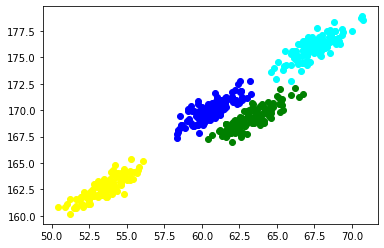

In [ ]:
frame = dataset
frame['cluster'] = labels2
frame.columns = ['01', '02', 'cluster']

color = ['blue', 'green', 'yellow', 'cyan']
for k in range(0, 4):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["01"], data["02"], c=color[k])
plt.show()

### Calling the GaussianMixture function from the scikit.mixture library and fitting then predicting the gmm model for 6 k values (2, 3, 4, 5, 6, 7).

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_library = GaussianMixture(n_components=2).fit(X)
label = gmm_library.predict(X)

gmm_library1 = GaussianMixture(n_components=3).fit(X)
label1 = gmm_library1.predict(X)

gmm_library2 = GaussianMixture(n_components=4).fit(X)
label2 = gmm_library2.predict(X)

gmm_library3 = GaussianMixture(n_components=5).fit(X)
label3 = gmm_library3.predict(X)

gmm_library4 = GaussianMixture(n_components=6).fit(X)
label4 = gmm_library4.predict(X)

gmm_library5 = GaussianMixture(n_components=7).fit(X)
label5 = gmm_library5.predict(X)

### Same as before, I have printed the silhouette scores for all the k values and here I got that k=3 has the best score, so I'm going to visualize the clusters using k=3.

In [ ]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(k=2): {silhouette_score(dataset, label)}')
print(f'Silhouette Score(k=3): {silhouette_score(dataset, label1)}')
print(f'Silhouette Score(k=4): {silhouette_score(dataset, label2)}')
print(f'Silhouette Score(k=5): {silhouette_score(dataset, label3)}')
print(f'Silhouette Score(k=6): {silhouette_score(dataset, label4)}')
print(f'Silhouette Score(k=7): {silhouette_score(dataset, labels5)}')

Silhouette Score(k=2): 0.6519708145482093
Silhouette Score(k=3): 0.7368904960425261
Silhouette Score(k=4): 0.6205524431950971
Silhouette Score(k=5): 0.539658083289608
Silhouette Score(k=6): 0.46657294904556773
Silhouette Score(k=7): 0.4397929320183785


### The plot is actually quite similar as the plot above using GMM from scratch the only difference is in the amount of clusters. So, I can conclude that GMM from scratch and using the scikit library gave me quite similar results.

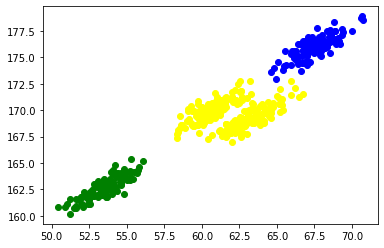

In [ ]:
frame = dataset
frame['cluster'] = label1
frame.columns = ['Atribut_01', 'Atribut_02', 'cluster']

color=['blue', 'green', 'yellow']
for k in range(0, 3):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Atribut_01"], data["Atribut_02"], c=color[k])
plt.show()

### References: https://github.com/saniikakulkarni/Gaussian-Mixture-Model-from-scratch/blob/main/Gaussian_Mixture_Model_from_scratch.ipynb
### https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/